# Ingest data

In [13]:
from urllib.request import urlopen

In [14]:
url_sunalsorises = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
url_menwithoutwomen = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
url_winnertakenothing = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-t.txt"
url_greenhillsofafrica = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-t.txt"
url_acrosstheriver = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
url_oldmanandthesea = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"

In [15]:
# 1. grab text from website
raw_sunalsorises = urlopen(url_sunalsorises).read().decode('unicode_escape')
raw_menwithoutwomen = urlopen(url_menwithoutwomen).read().decode('unicode_escape')
raw_winnertakenothing = urlopen(url_winnertakenothing).read().decode('unicode_escape')
raw_greenhillsofafrica = urlopen(url_greenhillsofafrica).read().decode('unicode_escape')
raw_acrosstheriver = urlopen(url_acrosstheriver).read().decode('unicode_escape')
raw_oldmanandthesea = urlopen(url_oldmanandthesea).read().decode('unicode_escape')
print("Finished grab text.")

In [ ]:
def writeTxt(txt,name):
    with open("HeimingwayTxt//"+name+".txt","w") as f:
        f.write(txt)
# save txt to local
writeTxt(raw_sunalsorises,"sunalsorises")
writeTxt(raw_menwithoutwomen,"menwithoutwomen")
writeTxt(raw_winnertakenothing,"winnertakenothing")
writeTxt(raw_greenhillsofafrica,"greenhillsofafrica")
writeTxt(raw_acrosstheriver,"acrosstheriver")
writeTxt(raw_oldmanandthesea,"oldmanandthesea")

# EDA

In [2]:
# https://github.com/explosion/spacy-models/tags?after=fr_core_news_md-3.2.0
# pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz
# pip install en_core_web_sm-3.2.0.tar.gz

In [4]:
from pathlib import Path

# 2. or download these files 
import os
import pandas as pd

txt_dir = "HeimingwayTxt"
sar_path = os.path.join(txt_dir,"sunalsorises.txt")
mww_path = os.path.join(txt_dir,"menwithoutwomen.txt")
wtn_path = os.path.join(txt_dir,"winnertakenothing.txt")
ghoa_path = os.path.join(txt_dir,"greenhillsofafrica.txt")
atr_path = os.path.join(txt_dir,"acrosstheriver.txt")
omas_path = os.path.join(txt_dir,"oldmanandthesea.txt")

txt_sar = Path(sar_path).read_text(encoding="unicode_escape").replace("\n", " ")
txt_mww = Path(mww_path).read_text(encoding="unicode_escape").replace("\n", " ")
txt_wtn = Path(wtn_path).read_text(encoding="unicode_escape").replace("\n", " ")
txt_ghoa = Path(ghoa_path).read_text(encoding="unicode_escape").replace("\n", " ")
txt_atr = Path(atr_path).read_text(encoding="unicode_escape").replace("\n", " ")
txt_omas = Path(omas_path).read_text(encoding="unicode_escape").replace("\n", " ")

In [18]:
from nltk import word_tokenize 
txts = [txt_sar,txt_mww,txt_wtn,txt_ghoa,txt_atr,txt_omas]
nums = []
for txt in txts:
    wd = word_tokenize(txt)
    my_stop = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    word_list = [word for word in wd if word not in my_stop]
    nums += [len(word_list)]

In [19]:
bookName =["sun also rises", "men without women", "winner take nothing", 
                               "green hills of africa", "across the river", "old man and the sea"
                              ]

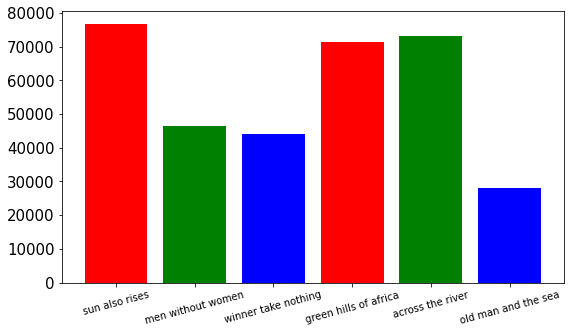

In [50]:
import matplotlib.pyplot as plt  
fig = plt.figure(figsize=(9,5))
plt.yticks(fontsize=15)
plt.xticks(rotation=15,fontsize=10)
plt.bar(bookName, nums, color =["r","g","b"])  
plt.show()  

## File Similarity

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
nlp_sar = nlp(txt_sar)
nlp_mww = nlp(txt_mww)
nlp_wtn = nlp(txt_wtn)
nlp_ghoa = nlp(txt_ghoa)
nlp_atr = nlp(txt_atr)
nlp_omas = nlp(txt_omas)

In [37]:
import pandas as pd

nlp_similar = [nlp_sar, nlp_mww, nlp_wtn, nlp_ghoa,nlp_atr, nlp_omas]
nlp_result = []
for i in range(len(nlp_similar)):
    temp = []
    for j in range(len(nlp_similar)):
        temp.append(nlp_similar[i].similarity(nlp_similar[j]))
    nlp_result.append(temp)


/var/folders/r1/rx1qw3j54d36hntsvy0pwzlm0000gn/T/ipykernel_71556/3510195172.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  temp.append(nlp_similar[i].similarity(nlp_similar[j]))


In [38]:
nlp_df = pd.DataFrame(nlp_result, 
                      columns = ["sun also rises", "men without women", "winner take nothing", 
                               "green hills of africa", "across the river", "old man and the sea"
                              ],
                      index = ["sun also rises", "men without women", "winner take nothing", 
                               "green hills of africa", "across the river", "old man and the sea"
                              ]
                     )

In [39]:
nlp_df

,sun also rises,men without women,winner take nothing,green hills of africa,across the river,old man and the sea
sun also rises,1.000000,0.993505,0.988947,0.916668,0.937256,0.903955
men without women,0.993505,1.000000,0.986351,0.922302,0.935912,0.916338
winner take nothing,0.988947,0.986351,1.000000,0.920953,0.943296,0.919469
green hills of africa,0.916668,0.922302,0.920953,1.000000,0.920519,0.946067
across the river,0.937256,0.935912,0.943296,0.920519,1.000000,0.903058
old man and the sea,0.903955,0.916338,0.919469,0.946067,0.903058,1.000000


<AxesSubplot:>

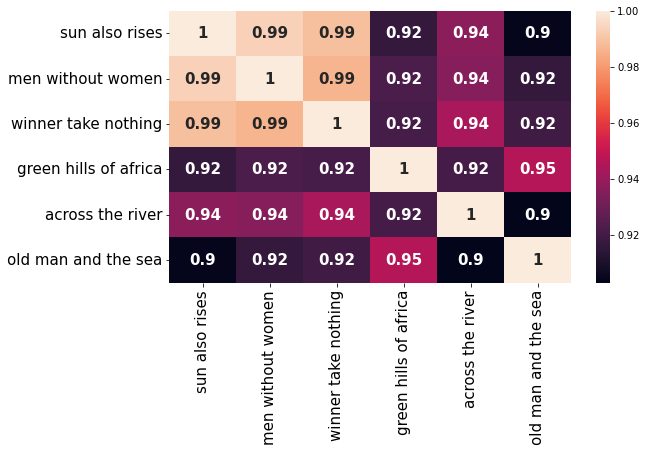

In [51]:
fig = plt.figure(figsize=(9,5))
import seaborn as sns
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.heatmap(nlp_df,annot=True,\
            annot_kws={'size':15,'weight':'bold'}) 

## Emotion Analysis

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sent_tokenize,word_tokenize

In [53]:
# negative neutral positive compound
def emotion_analysis(book_text):
    sid = SentimentIntensityAnalyzer()
    result = []
    for sen in sent_tokenize(book_text):
        senti = sid.polarity_scores(sen)   # text
        senti['text'] = sen
        result.append(senti)
    res_df = pd.DataFrame(result)
    return res_df

In [54]:
df_sar = emotion_analysis(txt_sar)  # sun also rises
df_mww = emotion_analysis(txt_mww)  # man without woman
df_wtn = emotion_analysis(txt_wtn)  # winnner take nothing
df_ghoa = emotion_analysis(txt_ghoa) # green hills of africa
df_atr = emotion_analysis(txt_atr) # across the river
df_omas = emotion_analysis(txt_omas) # old man and the sea

In [55]:
df = [df_sar,df_mww,df_wtn,df_ghoa,df_atr,df_omas]

In [64]:
means = []
for b in df:
    means += [b['compound'].mean()]

In [65]:
means

[0.034379303915475626,
 0.018998238573021117,
 0.013565171974522238,
 0.006244506446026558,
 0.05599073292701999,
 0.059687674779906504]

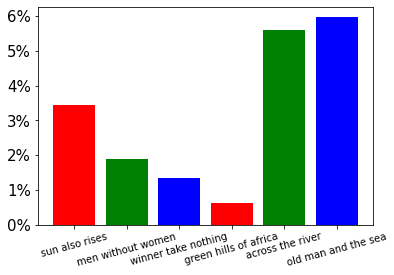

In [76]:
import matplotlib.pyplot as plt
from matplotlib import ticker
fig,ax = plt.subplots() 
#fig = plt.figure(figsize=(9,5))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
plt.yticks(fontsize=15)
plt.xticks(rotation=15,fontsize=10)
plt.bar(bookName, means, color =["r","g","b"])  
plt.show() 

In [81]:
## Word Cloud Visualizations

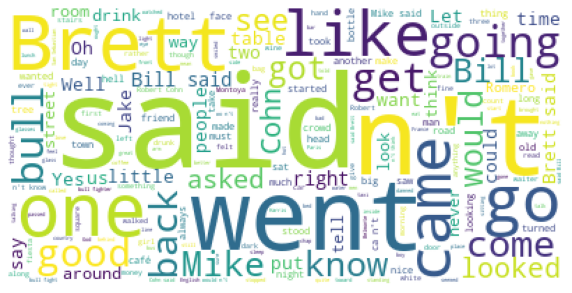

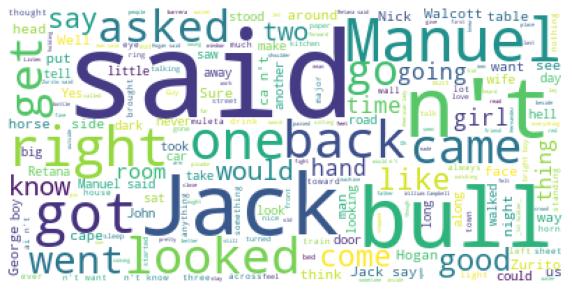

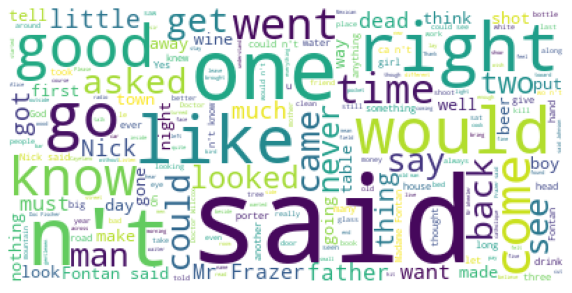

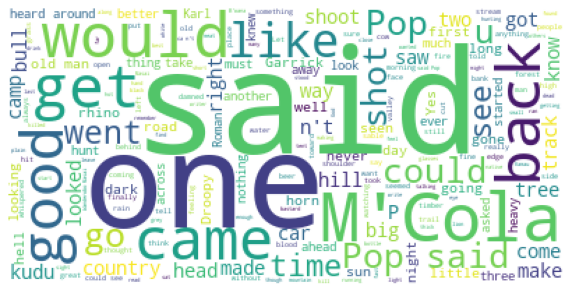

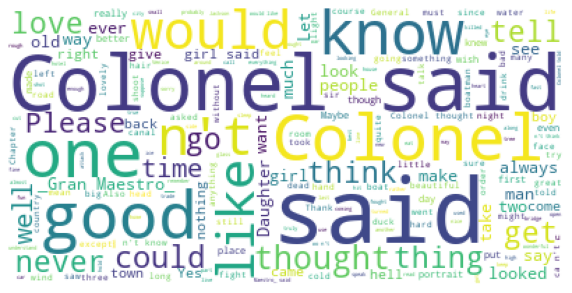

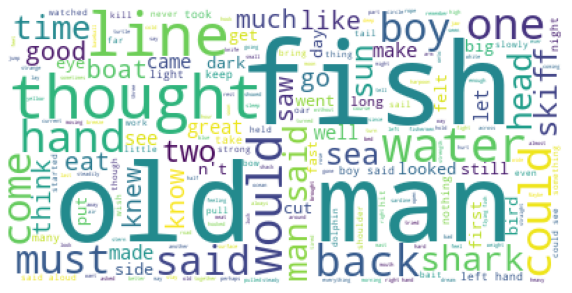

In [78]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk import FreqDist  
def draw_word_cloud(book_txt):
    my_stop = stopwords.words('english')
    my_stop += [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    wd = word_tokenize(book_txt)
    word_list = [word for word in wd if word not in my_stop]
    text = ' '.join(word_list)
    wc = WordCloud(stopwords=my_stop, background_color='white').generate(text)
    # show the picture
    plt.figure(figsize=(10,6.18))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
draw_word_cloud(txt_sar)  # sun also rises
draw_word_cloud(txt_mww)  # man without woman
draw_word_cloud(txt_wtn)  # winnner take nothing
draw_word_cloud(txt_ghoa) # green hills of africa
draw_word_cloud(txt_atr) # across the river
draw_word_cloud(txt_omas) # old man and the sea